# **CRIMES NOS ESTADOS DE SÃO PAULO E RIO DE JANEIRO NO ANO DE 2013**

Com posse de dois conjuntos de dados (datasets) relacionados a boletins de ocorrência policial (B.O.) nos estados de São Paulo e Rio de Janeiros, queremos estudar os crimes de maior ocorrência em ambos os estados.

Os dados analisados referem-se aos B.O. registrados durante todo o ano de 2013.

# 1. Importando as Bibliotecas e Conhecendo os Datasets

Os dados foram obtidos do Kaggle

Link dos dataset dos crimes em São Paulo: <a href="https://www.kaggle.com/inquisitivecrow/crime-data-in-brazil" target="-blank">Crime Data in Brazil</a>

Link do dataset dos crimes no Rio de Janeiro: <a href="https://www.kaggle.com/victorcvriano/crimes-estado-rio-de-janeiro-2009-a-2019" target="_blank">Crimes no Estado do Rio de Janeiro</a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import datetime


In [2]:
# importnado os datasets
rio = pd.read_csv("rj_2010_2014.csv", sep=";", encoding='iso-8859-1') # dataset do estado do RJ
rio_ = rio.loc[rio.ano == 2013] # selecionando somente os dados do ano de 2013
rj_df = pd.DataFrame(rio_) # criando o dataset do RJ

sp_1 = pd.read_csv("sp_2013_1.csv") # dataset de SP dos dados do primeiros 6 meses de 2013
sp_2 = pd.read_csv("sp_2013_2.csv") # dataset de SP dos dados do último 6 meses ano de 2013
sp_df = pd.concat([sp_1,sp_2])


In [3]:
# exibe as primeiras linhas do dataset do RJ
rj_df.head()

,controle,ano,mes,titulo_do,total_rbft,conteudo,dp,cisp,data_com,data_fato,...,municipio_fato,local,sexo,data_nasc,cor,profissao,relacao,bairro_vit,municipio_vit,idade
567109,00176671-2013,2013,Janeiro,Furto a transeunte,Furto,casos,014a. Leblon,012a. Copacabana,2013-01-01,2013-01-01,...,Rio de Janeiro (Capital),Via pública,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN
567110,00255171-2013,2013,Janeiro,Furto de telefone celular,Furto,casos,010a. Botafogo,012a. Copacabana,2013-01-01,2012-12-31,...,Rio de Janeiro (Capital),Praia,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN
567111,00466231-2013,2013,Janeiro,Furto a transeunte,Furto,casos,010a. Botafogo,012a. Copacabana,2013-01-01,2013-01-01,...,Rio de Janeiro (Capital),Via pública,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN
567112,00490161-2013,2013,Janeiro,Furto a transeunte,Furto,casos,012a. Copacabana,012a. Copacabana,2013-01-01,2012-12-31,...,Rio de Janeiro (Capital),Praia,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN
567113,00504871-2013,2013,Janeiro,Furto a transeunte,Furto,casos,042a. Recreio,012a. Copacabana,2013-01-01,2012-12-31,...,Rio de Janeiro (Capital),Praia,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN


In [4]:
# exibe as primeiras linhas do dataset de SP
sp_df.head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,...,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,DESCR_TIPO_PESSOA,CONT_PESSOA,SEXO_PESSOA,IDADE_PESSOA,COR,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
0,1,2013,10115,DECAP,DEL.SEC.1º CENTRO,CENTRAL DE FLAGRANTES 1ªSEC II,DECAP,DEL.SEC.1º CENTRO,05º D.P. ACLIMACAO,2013,...,R JACEGUAI,550,C,Indiciado,4.0,M,27.0,Parda,DESEMPREGADO(A),2 Grau completo
1,1,2013,10212,DECAP,DEL.SEC.6º SANTO AMARO,DEL.PROTECAO IDOSO- 6ª SEC.,DECAP,DEL.SEC.6º SANTO AMARO,101º D.P. JDIM IMBUIAS,2013,...,R MANOEL GUILHERME DOS REIS,641,C,Vítima,1.0,M,62.0,Parda,APOSENTADO(A),1 Grau completo
2,1,2013,10216,DECAP,DEL.SEC.2º SUL,16º D.P. VILA CLEMENTINO,DECAP,DEL.SEC.2º SUL,16º D.P. VILA CLEMENTINO,2013,...,R TRES DE MAIO,264,C,Autor,2.0,M,32.0,Branca,ENFERMEIRO(A),Superior completo
3,1,2013,10315,DECAP,DEL.SEC.3º OESTE,15º D.P. DR. LUC. H BEIGUELMAN,DECAP,DEL.SEC.3º OESTE,15º D.P. DR. LUC. H BEIGUELMAN,2013,...,R LEOPOLDO COUTO DE MAGALHAES JR,NaN,C,Testemunha,6.0,M,66.0,Branca,CONTADOR(A),Superior completo
4,1,2013,10330,DECAP,DEL.SEC.2º SUL,27º D.P. IBIRAPUERA,DECAP,DEL.SEC.2º SUL,96º D.P. MONÇÕES,2013,...,R JOAO AMARO,439,C,Vítima,3.0,M,60.0,Amarela,ENGENHEIRO CIVIL,Superior completo


In [5]:
# Mostra o número de linha e colunas de cada dataset
print(f"O dataset do Estado do Rio de Janeiro tem {rj_df.shape[0]} linhas e {rj_df.shape[1]} colunas")
print(f"O dataset do Estado de São Paulo tem {sp_df.shape[0]} linhas e {sp_df.shape[1]} colunas")

O dataset do Estado do Rio de Janeiro tem 204433 linhas e 23 colunas
O dataset do Estado de São Paulo tem 1910420 linhas e 30 colunas


In [6]:
# Lista os nomes das colunas do dataset do RJ
print("Colunas do rj_df")
print(rj_df.columns)

Colunas do rj_df
Index(['controle', 'ano', 'mes', 'titulo_do', 'total_rbft', 'conteudo', 'dp',
       'cisp', 'data_com', 'data_fato', 'hora_com', 'hora_fato', 'bairro_fato',
       'municipio_fato', 'local', 'sexo', 'data_nasc', 'cor', 'profissao',
       'relacao', 'bairro_vit', 'municipio_vit', 'idade'],
      dtype='object')


In [7]:
# Lista os nomes das colunas do dataset de SP
print("Colunas do sp_df")
print(sp_df.columns)

Colunas do sp_df
Index(['NUM_BO', 'ANO_BO', 'ID_DELEGACIA', 'NOME_DEPARTAMENTO',
       'NOME_SECCIONAL', 'DELEGACIA', 'NOME_DEPARTAMENTO_CIRC',
       'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC', 'ANO', 'MES',
       'DATA_OCORRENCIA_BO', 'HORA_OCORRENCIA_BO', 'FLAG_STATUS', 'RUBRICA',
       'DESDOBRAMENTO', 'CONDUTA', 'LATITUDE', 'LONGITUDE', 'CIDADE',
       'LOGRADOURO', 'NUMERO_LOGRADOURO', 'FLAG_STATUS.1', 'DESCR_TIPO_PESSOA',
       'CONT_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA', 'COR', 'DESCR_PROFISSAO',
       'DESCR_GRAU_INSTRUCAO'],
      dtype='object')


In [8]:
# mostra os valores nulos (nan)
print("Valores nulos em rj_df")
print(rj_df.isnull().sum(), "\n")
print("################################\n")
print("Valores nulos em sp_df")
print(sp_df.isnull().sum())

Valores nulos em rj_df
controle               0
ano                    0
mes                    0
titulo_do              0
total_rbft             0
conteudo               0
dp                     0
cisp                   0
data_com               0
data_fato           1292
hora_com               0
hora_fato              0
bairro_fato            0
municipio_fato         0
local                  0
sexo                   0
data_nasc         195504
cor                    0
profissao              0
relacao                0
bairro_vit             0
municipio_vit          0
idade             195508
dtype: int64 

################################

Valores nulos em sp_df
NUM_BO                          0
ANO_BO                          0
ID_DELEGACIA                    0
NOME_DEPARTAMENTO               0
NOME_SECCIONAL                  0
DELEGACIA                       0
NOME_DEPARTAMENTO_CIRC          0
NOME_SECCIONAL_CIRC             0
NOME_DELEGACIA_CIRC             0
ANO                     

Temos algumas colunas com grande quantidade de dados nulos, mas vamos deixar para limpá-los somente quando formos utilizar essas colunas em específico.

# 2. Análise de Roubos e Furtos em SP e RJ

Vamos começar listando as quantidades de ocorrências registradas em cada estado.

In [9]:
# listando os tipos de crimes
print("Lista de crimes no Estado do RJ")
print(rj_df.titulo_do.value_counts(), '\n')
print("###############################################\n")
print("Lista de crimes no Estado de SP")
print(sp_df.RUBRICA.value_counts())

Lista de crimes no Estado do RJ
Roubo a transeunte                           60600
Furto a transeunte                           34681
Roubo de veículo                             27983
Furto de telefone celular                    17940
Furto de veículos                            17666
Furto em coletivo                            10609
Roubo a estabelecimento comercial             6924
Roubo em coletivo                             6169
Estupro                                       5995
Roubo de aparelho celular                     5465
Homicídio doloso                              4749
Roubo de carga                                3533
Roubo a residência                            1484
Morte por intervenção de agente do Estado      416
Latrocínio (Roubo seguido de morte)            148
Roubo de caixa eletrônico                       50
Roubo a banco                                   21
Name: titulo_do, dtype: int64 

###############################################

Lista de crimes no E

Os dados de crimes em SP possuem mais registros de diferentes crimes que nos dados do RJ. 
Por questão de comparação, só usaremos os dados de crimes de roubo e furto.

In [10]:
# seleciona os dados classificados como roubo e furto
roubo_rj = rj_df.loc[rj_df["total_rbft"] == 'Roubo'] # apenas os dados de roubo no RJ
furto_rj = rj_df.loc[rj_df["total_rbft"] == 'Furto'] # apenas os dados de furto no RJ

roubo_sp = sp_df.loc[sp_df["RUBRICA"] == 'Roubo (art. 157)'] # apenas os dados de roubo em SP
roubo_sp["RUBRICA"] = roubo_sp["RUBRICA"].apply(lambda x: ''.join(['', x.split(' ')[0]]).strip()) # separa nome e art do crime 
furto_sp = sp_df.loc[sp_df["RUBRICA"] == 'Furto (art. 155)'] # apenas os dados de furto em SP
furto_sp["RUBRICA"] = furto_sp["RUBRICA"].apply(lambda x: ''.join(['', x.split(' ')[0]]).strip()) # separa nome do art do crime 



ipykernel_launcher:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


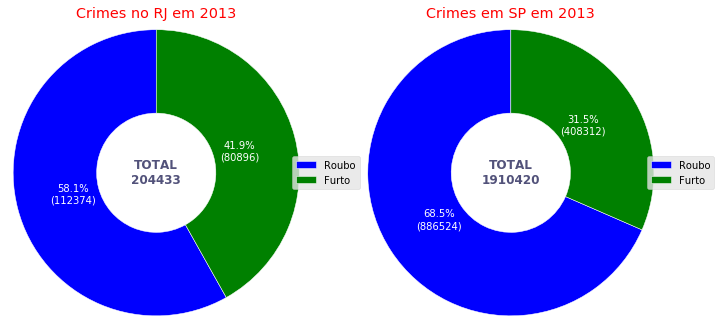

In [11]:
# comparando os números de casos de roubo e furto no RJ e em SP
def rotulacao(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes_rj = [roubo_rj["total_rbft"].count(),furto_rj["total_rbft"].count()] # tamanho dos pesos do RJ
sizes_sp = [roubo_sp["RUBRICA"].count(),furto_sp["RUBRICA"].count()] # tamanho dos pesos do SP

fig0, (ax1,ax2) = plt.subplots(1,2,figsize=(10,9))
wedges, texts, autotexts = ax1.pie(sizes_rj,
                                   autopct=lambda pct: rotulacao(pct, sizes_rj),
                                   radius=1.2,
                                   colors=['blue','green'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))

wedges, texts, autotexts = ax2.pie(sizes_sp,
                                   autopct=lambda pct2: rotulacao(pct2, sizes_sp),
                                   radius=1.2,
                                   colors=['blue','green'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))

ax1.legend(wedges, ['Roubo','Furto'],
           loc='center right',
           bbox_to_anchor=(0.7, 0, 0.5, 1))
ax2.legend(wedges, ['Roubo','Furto'],
           loc='center right',
           bbox_to_anchor=(0.7, 0, 0.5, 1))


ax1.text(0,0, 'TOTAL\n{}'.format(rj_df["total_rbft"].count()),
         weight='bold', size=12, color='#52527a',
         ha='center', va='center')
ax2.text(0,0, 'TOTAL\n{}'.format(sp_df["RUBRICA"].count()),
         weight='bold', size=12, color='#52527a',
         ha='center', va='center')

ax1.set_title("Crimes no RJ em 2013", color="red")
ax2.set_title("Crimes em SP em 2013", color="red")
plt.tight_layout() 
plt.show()

No ano de 2013, houve mais roubos no estado de São Paulo, enquanto que a maior ocorrência de furtos foi no estado do Rio de Janeiro.

# 3. Idade por Gênero das Vítimas

Nessa seção, vamos analisar a idade e gênero das vítimas de crimes de roubo e furto nos estados de SP e RJ.

In [12]:
# Em São Paulo
vitimas_sp = sp_df[['SEXO_PESSOA', 'DESCR_TIPO_PESSOA', "IDADE_PESSOA"]].loc[
        (
         
         (
            (sp_df['SEXO_PESSOA'].str.contains('F')) | 
            (sp_df['SEXO_PESSOA'].str.contains('M'))
            
          )
         & (sp_df['SEXO_PESSOA'].isna() == False)
        )&(
        
          (
              (sp_df['DESCR_TIPO_PESSOA'].str.contains('Vítima'))
          )
        
        & (sp_df['DESCR_TIPO_PESSOA'].isna() == False)
     
        )&(
          (sp_df['IDADE_PESSOA'].isna() == False)
            
        )
        ].groupby(['SEXO_PESSOA'], as_index=False).mean()

vitimas_sp.loc[vitimas_sp['SEXO_PESSOA'] == 'M', 'SEXO_PESSOA'] = 'masculino'
vitimas_sp.loc[vitimas_sp['SEXO_PESSOA'] == 'F', 'SEXO_PESSOA'] = 'feminino'

In [13]:
# No Rio de Janeiro
vitimas_rj = rj_df[['sexo', 'conteudo', "idade"]].loc[
        (
         
         (
            (rj_df['sexo'].str.contains('feminino')) | 
            (rj_df['sexo'].str.contains('masculino'))
            
          )
         & (rj_df['sexo'].isna() == False)
        )&(
        
          (
              (rj_df['conteudo'].str.contains('vítimas'))
          )
        
        & (rj_df['conteudo'].isna() == False)
     
        )&(
          (rj_df['idade'].isna() == False)
            
        )
        ].groupby(['sexo'], as_index=False).mean()

Text(0, 0.5, 'Idade Média')

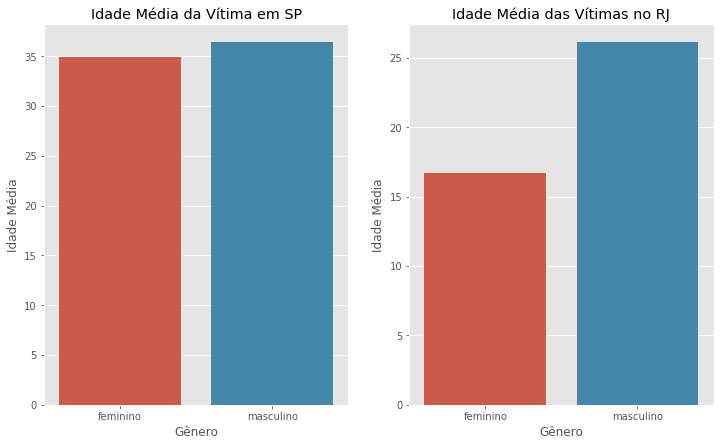

In [14]:
fig, ax = plt.subplots(1,2, figsize=(12,7))
sns.barplot(ax=ax[0], x="SEXO_PESSOA", y="IDADE_PESSOA", data=vitimas_sp)
sns.barplot(ax=ax[1], x="sexo", y="idade", data=vitimas_rj)
ax[0].set_title("Idade Média da Vítima em SP")
ax[0].set_xlabel("Gênero")
ax[0].set_ylabel("Idade Média")
ax[1].set_title("Idade Média das Vítimas no RJ")
ax[1].set_xlabel("Gênero")
ax[1].set_ylabel("Idade Média")

Vemos que existe uma grande diferença de idade das vítimas em ambos os estados.

Em São Paulo, a diferença de idade média das vítimas homens e mulheres foi pequena, em torno dos 35 anos para as mulheres e  aproximadamente 38 anos para os homens.

Já no Rio de Janeiro, as idades médias das vítimas, em ambos os gêneros, são bem menores em comparação a São Paulo. Para os homens a idade média foi de aproximadamente 27 anos, enquanto que para as mulheres a faixa etária foi bem menor, por volta dos 17 anos.

# 4. Cidades com mais registros de Roubo e Furto

Aqui vamos coletar uma informação muito importante, quais cidades em cada estado tiveram maiores ocorrências de roubo e furto no ano de 2013.

In [15]:
# remove os espaços em branco dos valores das colunas "CIDADE"
roubo_sp["CIDADE"] = roubo_sp["CIDADE"].str.strip(" ")
furto_sp["CIDADE"] = furto_sp["CIDADE"].str.strip(" ")

# remove variações do mesmo nomes 
furto_sp["CIDADE"] = furto_sp["CIDADE"].replace(["São Paulo", "SAO PAULO", "SÃO PAULO"], "S.PAULO")
furto_sp["CIDADE"] = furto_sp["CIDADE"].replace("São Bernardo do Campo", "S.BERNARDO DO CAMPO")

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:7: SettingWithCopyWarning: 
A value is trying to be

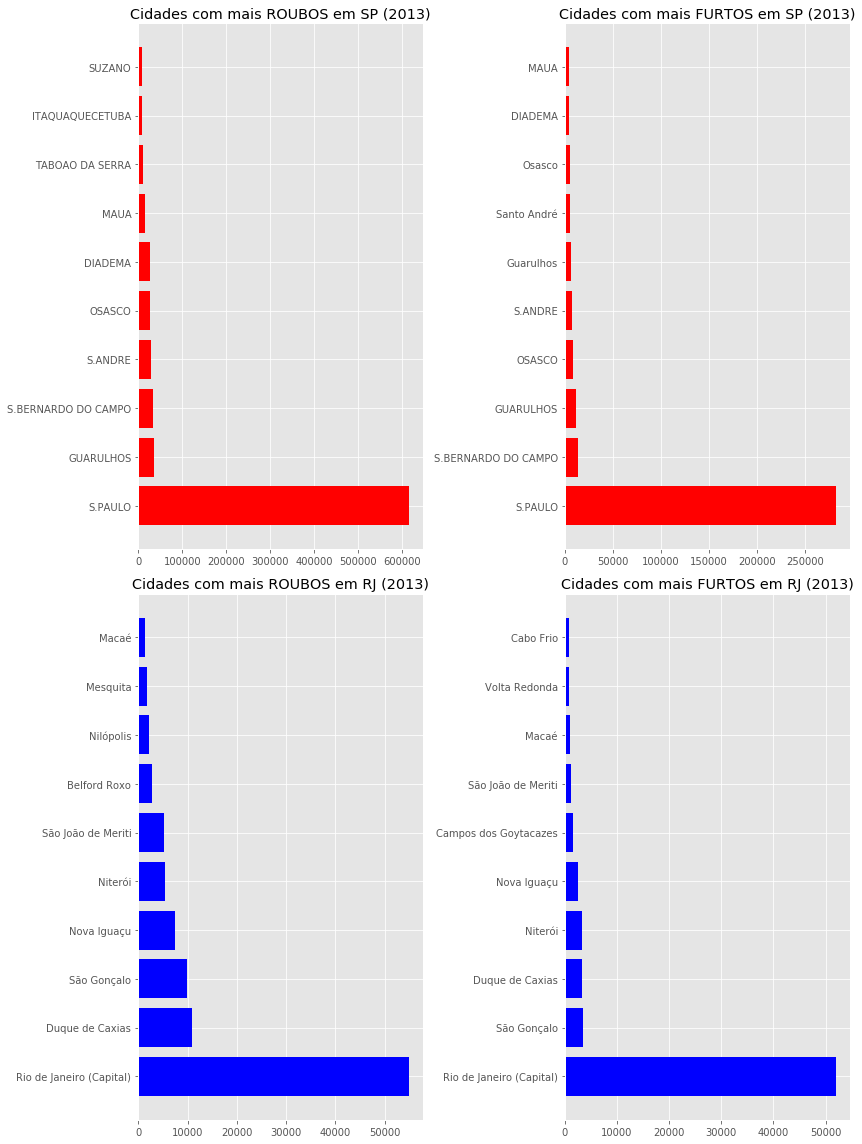

In [16]:
# agrupa as 10 cidades com maior quantidade de registros de roubo e furto

# Em São Paulo
cid = roubo_sp[['RUBRICA', 'CIDADE']].groupby('CIDADE', 
                as_index=False).count().sort_values(by='RUBRICA', ascending=False)[:10]
cid2 = furto_sp[['RUBRICA', 'CIDADE']].groupby('CIDADE', 
                as_index=False).count().sort_values(by='RUBRICA', ascending=False)[:10]

# No Rio de Janeiro
cid3 = roubo_rj[['total_rbft', 'municipio_fato']].groupby('municipio_fato', 
                as_index=False).count().sort_values(by='total_rbft', ascending=False)[:10]
cid4 = furto_rj[['total_rbft', 'municipio_fato']].groupby('municipio_fato', 
                as_index=False).count().sort_values(by='total_rbft', ascending=False)[:10]

fig, ax = plt.subplots(2,2,figsize=(12,16))
ax[0][0].barh(cid["CIDADE"], cid["RUBRICA"], align="center",color="red")
ax[0][1].barh(cid2["CIDADE"], cid2["RUBRICA"],align="center",color="red")
ax[1][0].barh(cid3["municipio_fato"], cid3["total_rbft"],align="center",color="blue")
ax[1][1].barh(cid4["municipio_fato"], cid4["total_rbft"],align="center",color="blue")
ax[0][0].set_title("Cidades com mais ROUBOS em SP (2013)")
ax[0][1].set_title("Cidades com mais FURTOS em SP (2013)")
ax[1][0].set_title("Cidades com mais ROUBOS em RJ (2013)")
ax[1][1].set_title("Cidades com mais FURTOS em RJ (2013)")
plt.tight_layout()
plt.show()

De acordo com os gráficos acima, as cidades capitais dos estados são as que comportam os maiores registros de casos de roubo e furto.

Fora as capitais, as cinco cidade com mais ocorrências de roubo e furto foram:
* No estado de SP: Guarulhos, São Bernardo do Campo, Santo André, Osasco e Diadema

* No estado do Rio de Janeiro: Duque de Caxias, São Gonçalo, Nova Iguaçu, Niterói e São José do Meriti.

# 5. Cor dos Envolvidos em B.O.

Outro ponto importante é analisar a cor de pele dos envolvidos nas ocorrências.

In [17]:
sp_df['COR'] = sp_df['COR'].str.strip() # retira os espaços em branco
copia_sp = sp_df.copy() #cria uma cópia dos dados
copia_rj =rj_df.copy()
copia_sp['COR'] = copia_sp['COR'].replace("Preta", "Negra") 
copia_rj['cor'] = copia_rj['cor'].replace("índio", "vermelha") # altera os nomes

# define como valores nulos cores diferentes de preta, parda, branca, amarela e vermelha
bool = (rj_df['cor'] != 'negra') & (rj_df['cor'] != 'parda') & (rj_df['cor'] != 'branca') & (rj_df['cor'] != 'amarela') & (rj_df['cor'] != 'vermelha')
rj_df['cor'].loc[bool] = np.NaN

C:\Users\MichelinJV\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Text(0, 0.5, 'Quantidade')

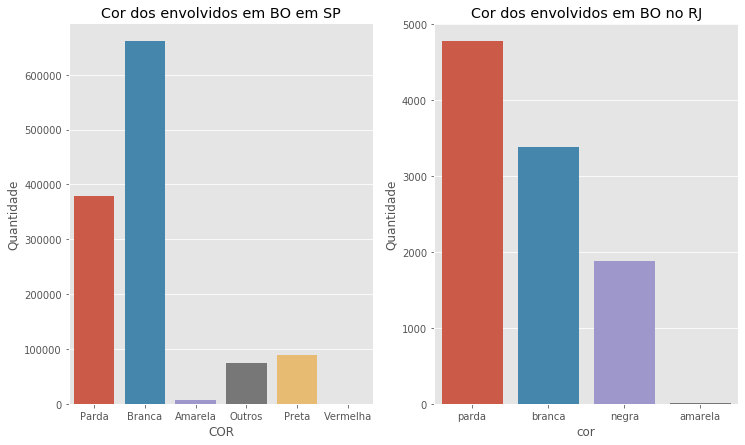

In [18]:
f, ax = plt.subplots(1,2, figsize=(12,7))
sns.countplot(ax=ax[0],x="COR", data=sp_df)
sns.countplot(ax=ax[1],x="cor", data=rj_df)
ax[0].set_title("Cor dos envolvidos em BO em SP")
ax[1].set_title("Cor dos envolvidos em BO no RJ")
ax[0].set_ylabel("Quantidade")
ax[1].set_ylabel("Quantidade")

Os gráficos mostram que pessoas brancas e pardas são as que mais possuem registros de ocorrências.

# 6. Hora e Mês das Ocorrências

Podemos agora analisar os peíodos dos dia e do ano onde ocorem mais roubos e furtos.

In [19]:
# Em SP
sp_df['DATA_OCORRENCIA_BO'] = pd.to_datetime(sp_df['DATA_OCORRENCIA_BO'], errors='coerce') # dados tipo datetime
sp_df['HORA_OCORRENCIA_BO'] = pd.to_datetime(sp_df['HORA_OCORRENCIA_BO'], format='%H:%M', errors='coerce').dt.time
not_sp = sp_df["HORA_OCORRENCIA_BO"].notnull() # pega apenas os valores não nulos

pontos_sp = sp_df[not_sp]

list_sp = pd.Series.tolist(pontos_sp['HORA_OCORRENCIA_BO']) # cria uma lista com os valores
new_list_sp = []
for item in list_sp:
    new_list_sp.append(item.hour)
    
hora_sp = pd.DataFrame(new_list_sp, columns = ['QTD']) # cria um dateframe com a lista
hora_sp = pd.DataFrame(hora_sp['QTD'].value_counts()) # conta o quantidade de cada valor
hora_sp['HORA'] = hora_sp.index 

# No RJ
rj_df["hora_fato"] = rj_df["hora_fato"].replace("99", np.NaN)
rj_df['hora_fato'] = pd.to_datetime(rj_df['hora_fato'], errors='coerce')
rj_df['hora_fato'] = pd.to_datetime(rj_df['hora_fato'], format='%H:%M', errors='coerce').dt.time
not_rj = rj_df['hora_fato'].notnull() # pega apenas os valores não nulos

pontos_rj = rj_df[not_rj]

llist_rj = pd.Series.tolist(pontos_rj['hora_fato'])
new_list_rj = []
for item in llist_rj:
    new_list_rj.append(item.hour)
    
hora_rj = pd.DataFrame(new_list_rj, columns = ['QTD'])
hora_rj = pd.DataFrame(hora_rj['QTD'].value_counts())
hora_rj['HORA'] = hora_rj.index


Text(0.5, 1.0, 'Quantidade de BO por hora no RJ')

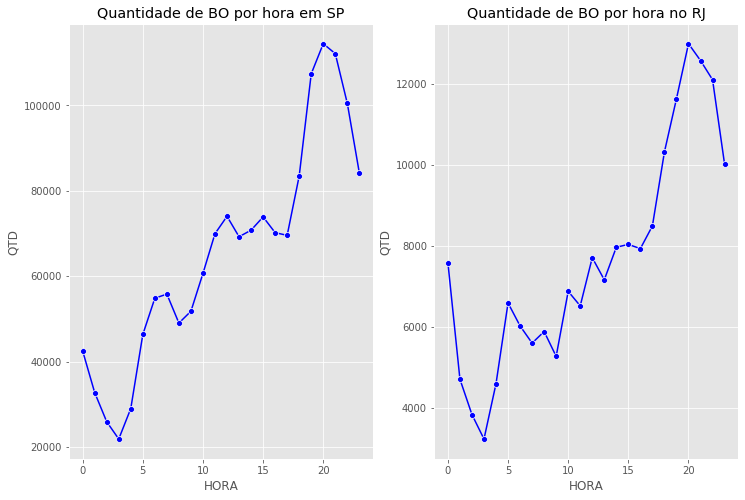

In [20]:
fi, ax = plt.subplots(1,2, figsize=(12,8))
sns.lineplot(hora_sp.HORA, hora_sp.QTD, marker="o", color='blue',ax=ax[0])
sns.lineplot(hora_rj.HORA, hora_rj.QTD, marker="o", color='blue',ax=ax[1])
ax[0].set_title("Quantidade de BO por hora em SP")
ax[1].set_title("Quantidade de BO por hora no RJ")

Em ambos os estados, os gráficos mostram que a maior quantidade de ocorrências de crimes ocorrem a noite, tendo seu pico às 20H.

In [21]:
#dicionário com os meses
dic = {1:"Janeiro", 2:"Fevereiro", 3:"Março", 4:"Abril", 5:"Maio", 6:"Junho", 
        7:"Julho", 8:"Agosto", 9:"Setembro", 10:"Outubro", 11: "Novembro", 12:"Dezembro"} 

roubo_sp["MES"] = roubo_sp["MES"].map(dic) # altera a nomenclatura dos meses
furto_sp["MES"] = furto_sp["MES"].map(dic)

ipykernel_launcher:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


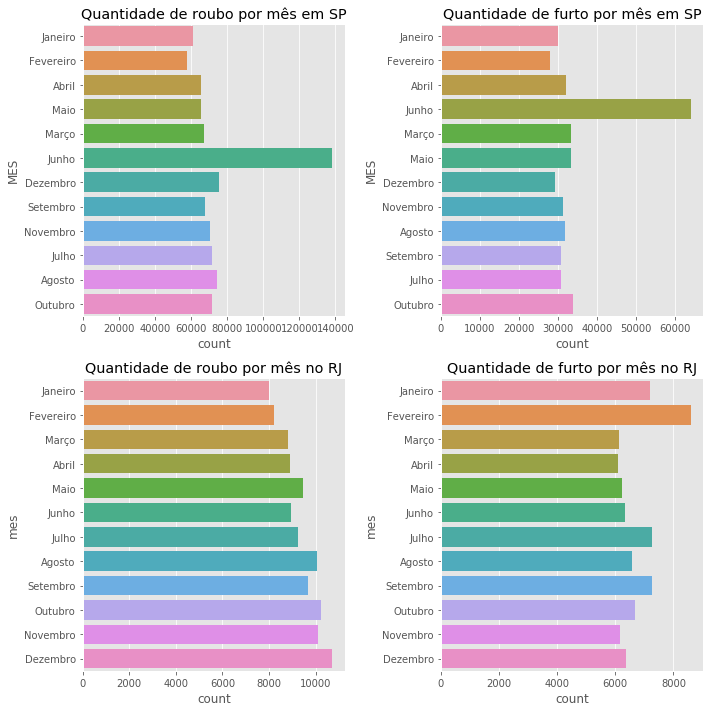

In [22]:
figu, ax = plt.subplots(2,2, figsize=(10,10))
sns.countplot(y="MES", data=roubo_sp,ax=ax[0][0])
sns.countplot(y="MES", data=furto_sp,ax=ax[0][1])
sns.countplot(y="mes", data=roubo_rj,ax=ax[1][0])
sns.countplot(y="mes", data=furto_rj,ax=ax[1][1])
ax[0][0].set_title("Quantidade de roubo por mês em SP")
ax[0][1].set_title("Quantidade de furto por mês em SP")
ax[1][0].set_title("Quantidade de roubo por mês no RJ")
ax[1][1].set_title("Quantidade de furto por mês no RJ")
plt.tight_layout()

De acordo com os gráficos, em São Paulo, Junho de 2013 foi o mês com maior ocorrências de tanto de roubo quanto de furto.

Para o estado do Rio de Janeiro, no ano de 2013, Dezembro foi o mês com maior ocorrência de roubo, enquanto que a maior ocorrência de furtos foi em Fevereiro.

# 7. Principais Ações nos crimes

Temos agora que responder a seguinte pergunta: quem ou que lugares sofrem mais casos de roubo e furto?

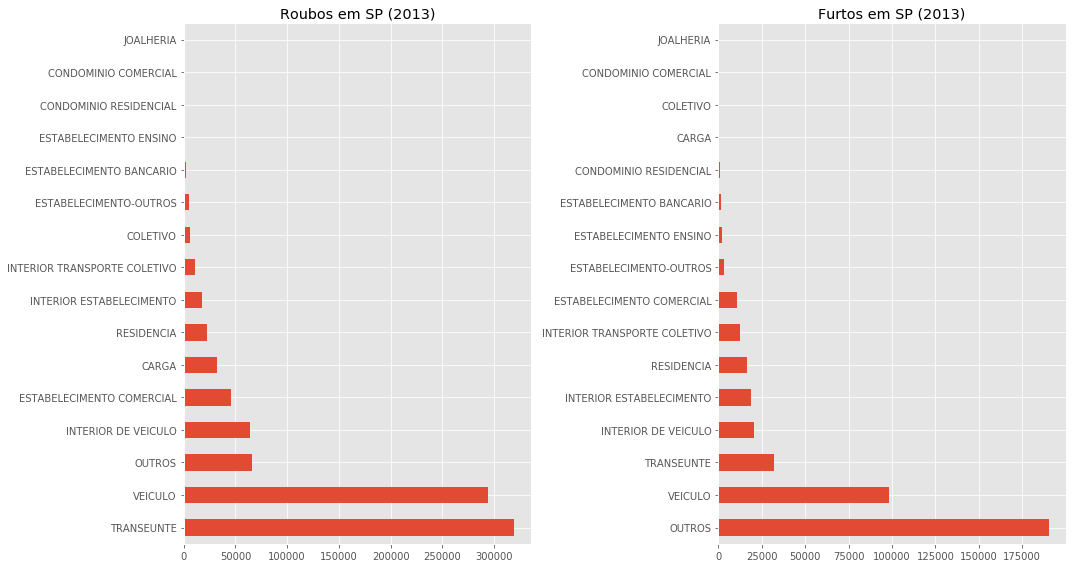

In [23]:
# Em SP
f, (ax1,ax2) = plt.subplots(1,2,figsize=(15,8))
roubo_sp["CONDUTA"].value_counts().plot(kind="barh",ax=ax1)
furto_sp["CONDUTA"].value_counts().plot(kind="barh",ax=ax2)
ax1.set_title("Roubos em SP (2013)")
ax2.set_title("Furtos em SP (2013)")
plt.tight_layout()

Em São Paulo, transeuntes foram os mais roubados, enquanto que os veículos foram os mais furtados.

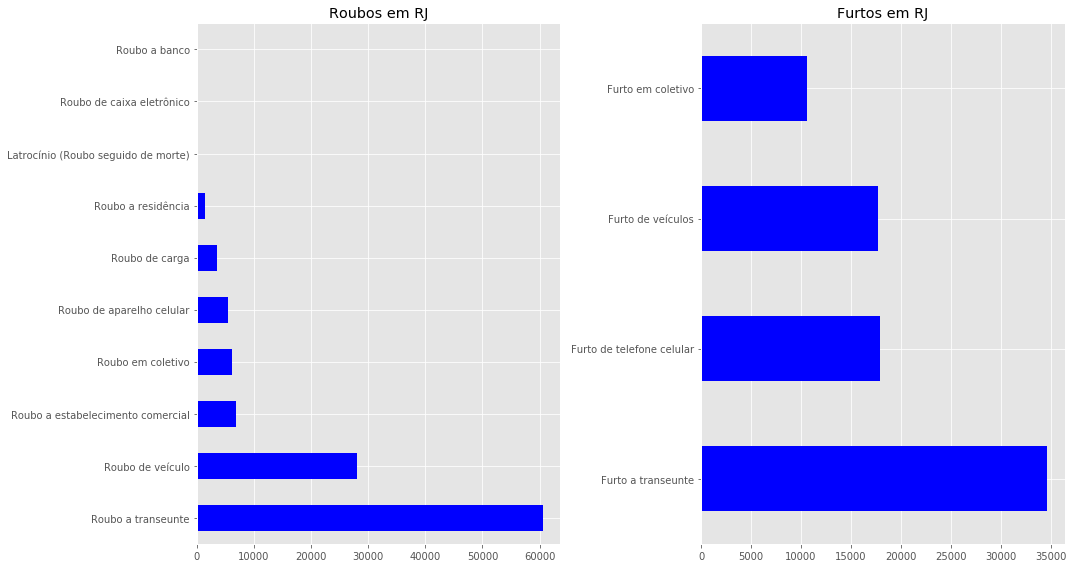

In [24]:
# Em RJ
f, (ax1,ax2) = plt.subplots(1,2,figsize=(15,8))
roubo_rj["titulo_do"].value_counts().plot(kind="barh",ax=ax1,color="blue")
furto_rj["titulo_do"].value_counts().plot(kind="barh",ax=ax2,color="blue")
ax1.set_title("Roubos em RJ")
ax2.set_title("Furtos em RJ")
plt.tight_layout()

No Rio de Janeiro, os transeuntes foram tanto os mais roubados quanto os furtados.

## 8. Conclusão

No Estado e São Paulo no ano de 2013:
* Mais ocorrências de roubo;
* As vítimas eram em maioria da cor branca, com idade média de 38 anos para homens e 35 para mulheres;
* Os picos de crimes aconteceram às 20H, sendo o mês de julho com maior número de ocorrências;
* A maior quantidade de casos de roubo aconteceram a transeuntes e os de furtos com carros.

No estado do Rio de Janeio no ano de 2013:
* Mais ocorrências de furtos;
* As vítimas eram em maioria da cor parda, com idade média de 27 anos para homens e 17 para mulheres;
* Os picos de crimes aconteceram às 20H, sendo o mês de dezembro e fevereiro com maior número de ocorrências de roubo e furto, respectivamente;
* A maior quantidade de casos de roubo e furto aconteceram a transeuntes.
